<a href="https://colab.research.google.com/github/IngridSchieven/Gini_versus_GDP_Assignment0806/blob/main/GDP_Gini_0806_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%load_ext google.colab.data_table

In [ ]:
# Is there a relation between a country's Gross Domestrict Product (GDP) and its income inequality?

# GDP versus GINI
# explore the 2(!) datasets
# resample were needed

In [ ]:
# GINI = Income Inequality
gini = pd.read_csv('/content/inequality-of-incomes-chartbook.csv')
gini

In [7]:
# GINI Explore
gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Entity                                          651 non-null    object 
 1   Code                                            651 non-null    object 
 2   Year                                            651 non-null    int64  
 3   Gini (Chartbook of Economic Inequality (2016))  651 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 20.5+ KB


In [ ]:
#Quick overview of missing data in GINI use these features:
for column in gini.columns:
    aantal_missing = np.sum(gini[column].isnull())
    print('{} - {}'.format(column, aantal_missing))

In [ ]:
#Clean up the dataset GINI
#drop multiple columns that are irrelevant
gini_2 = gini.drop(columns=['Code'])

#rename columns 
gini_3 = gini_2.rename(columns= {'Gini (Chartbook of Economic Inequality (2016))': 'Gini'})

#set_index to set a useful index 
#At the moment I'm not sure to do that, so I'll let it be...
gini_3.sample(5)

In [ ]:
# GDP = Gross Domestic Product
gdp = pd.read_csv('/content/gdp-per-capita-maddison-2020.csv')
gdp.sample(5)

In [21]:
# GDP Explore
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19876 entries, 0 to 19875
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Entity              19876 non-null  object 
 1   Code                19651 non-null  object 
 2   Year                19876 non-null  int64  
 3   GDP per capita      19876 non-null  float64
 4   417485-annotations  21 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 776.5+ KB


In [ ]:
#Quick overview of missing data GDP use these features:
for column in gdp.columns:
    aantal_missing = np.sum(gdp[column].isnull())
    print('{} - {}'.format(column, aantal_missing))

In [ ]:
#Clean up the dataset GINI
#drop multiple columns that are irrelevant
gdp_2 = gdp.drop(columns=['Code', '417485-annotations'])

#rename columns 
gdp_3 = gdp_2.rename(columns= {'GDP per capita': 'GDP'})

#set_index to set a useful index 
#At the moment I'm not sure to do that, so I'll let it be...
gdp_3.sample(5)

In [ ]:
#merging GINI and GPD into one DF
df = gini_3.merge(gdp_3).dropna() #let's also drop the missing values
df.sample(5)

In [123]:
#see if there's a correlation between the Gini and GDP
#do not know for sure if I can already do this formula .corr() now...
df.corr()

,Year,Gini,GDP
Year,1.000000,-0.025302,0.529752
Gini,-0.025302,1.000000,-0.383237
GDP,0.529752,-0.383237,1.000000


In [ ]:
# CONCLUSION

#See correlation coefficient above:
# Gini versus GDP = -0.38
# meaning of this coefficient: 
# If we wish to label the strength of the association, for absolute values of r, 0-0.19 is regarded as very weak, 
# 0.2-0.39 as weak, 0.40-0.59 as moderate, 0.6-0.79 as strong and 0.8-1 as very strong correlation, 
# but these are rather arbitrary limits, and the context of the results should be considered.

# conclusion: Weak correlation between Gini and GDP

# Just checking out the internet:

https://smartech.gatech.edu/bitstream/handle/1853/56630/paper-2.docx.pdf



In [119]:
#try pearsonr
from scipy.stats import pearsonr
pearsonr(df['Gini'], df['GDP']) 
#uitkomst -0.38 identiek aan df.corr()

(-0.3832369332703898, 3.332246543155838e-24)

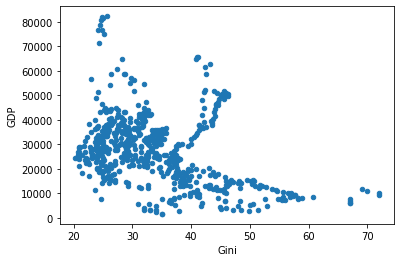

In [110]:
#just a scatter to visualize
ax = df.plot(kind='scatter', x='Gini', y='GDP')
# various lines/curves??? but most of them situated in the left down corner... so a stronger correlation?

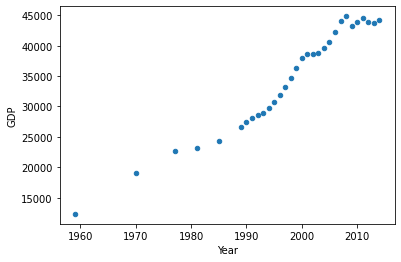

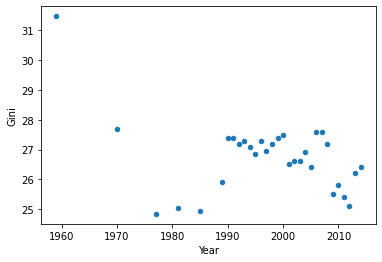

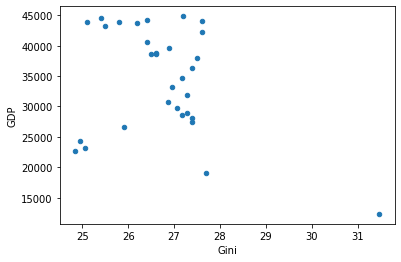

In [126]:
# Let's check The Netherlands
nl = df.loc[df['Entity'] == "Netherlands"]
#nl
ax = nl.plot(kind='scatter', x='Year', y='GDP') # duidelijk lineaire progressie # GDP stijgt door de jaren heen
ax = nl.plot(kind='scatter', x='Year', y='Gini') # ?
ax = nl.plot(kind='scatter', x='Gini', y='GDP')  # ?

In [112]:
nl.corr() #identiek nl.corr(method = 'pearson')

,Year,Gini,GDP
Year,1.000000,-0.39902,0.976012
Gini,-0.399020,1.00000,-0.332450
GDP,0.976012,-0.33245,1.000000


In [113]:
nl.corr(method = 'kendall') #wijkt af van pearson/default

,Year,Gini,GDP
Year,1.000000,-0.193066,0.935484
Gini,-0.193066,1.000000,-0.162696
GDP,0.935484,-0.162696,1.000000


In [ ]:
#testing groupby function
dff = df.groupby(['Entity', 'Year'])
dff.head(5)